In [1]:
from maelzel.core import *
cfg = getConfig()
# logger.parent.setLevel("DEBUG")

In [2]:
#cfg['quant.syncopMinFraction'] = 1/3
#cfg['quant.syncopPartMinFraction'] = 1/8
cfg['jupyterReprShow'] = False


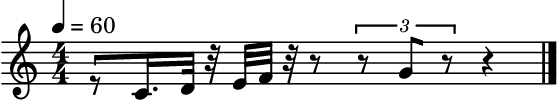

In [3]:
ch = Chain(r'''
r:1/2
c4:3/8
d4:1/8
r:1/8
e4:1/8
f4:1/8
r:1/8+1/2+1/3
g4:1/3


''')
ch.addSpanner('beam', 0, 1)
# ch.addSpanner('beam', 1, 2)
ch.show()

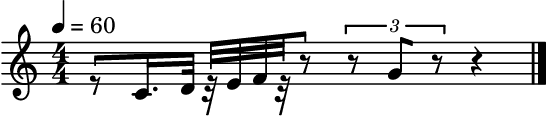

In [15]:
ch = Chain(r'''
r:1/2
c4:3/8
d4:1/8
r:1/8
e4:1/8
f4:1/8
r:1/8+1/2+1/3
g4:1/3


''')
ch.addSpanner('beam', 0, 1)
ch.addSpanner('beam', 1, 2)
ch.show()

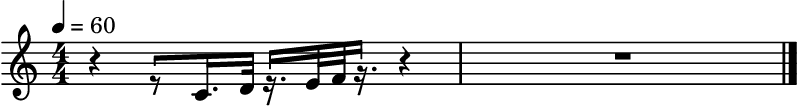

In [16]:
ch = Chain(r'''
r:1.5
c4:3/8
d4:1/8
r:3/8
e4:1/8
f4:1/8
r:1/2
r:3
''')
ch.addSpanner('beam', 1, 2)
ch.addSpanner('beam', 2, 3)

ch.write("~/tmp/beam3.ly")
ch.show()

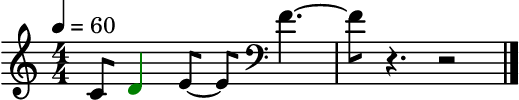

In [4]:
ch = Chain(r'''
    4C:0.5
    4D:1
    4E:1
    4F:2
''')
ch[1].addSymbol("green")
ch[2].addSymbol(symbols.SizeFactor(0.9))
ch[3].addSymbol(symbols.Clef('bass', color='red'))
ch.show()

In [5]:
ch.itemsBetween(0.25, 3)

[4C:1/2♩,
 4D:1♩:symbols=[Color(green)],
 4E:1♩:symbols=[SizeFactor(0.9)],
 4F:2♩:symbols=[Clef(kind=bass, color=red)]]

In [6]:
events = ch.eventsBetween(0.25, 3)
for ev in events:
    print(f"{str(ev).ljust(10)} :: {ev.parent}")

4C:1/2♩    :: Chain([4C:1/2♩, 4D:1♩:symbols=[Color(green)], 4E:1♩:symbols=[SizeFactor(0.9)], 4F:2♩:symbols=[Clef(kind=bass, color=red)]])
4D:1♩:symbols=[Color(green)] :: Chain([4C:1/2♩, 4D:1♩:symbols=[Color(green)], 4E:1♩:symbols=[SizeFactor(0.9)], 4F:2♩:symbols=[Clef(kind=bass, color=red)]])
4E:1♩:symbols=[SizeFactor(0.9)] :: Chain([4C:1/2♩, 4D:1♩:symbols=[Color(green)], 4E:1♩:symbols=[SizeFactor(0.9)], 4F:2♩:symbols=[Clef(kind=bass, color=red)]])
4F:2♩:symbols=[Clef(kind=bass, color=red)] :: Chain([4C:1/2♩, 4D:1♩:symbols=[Color(green)], 4E:1♩:symbols=[SizeFactor(0.9)], 4F:2♩:symbols=[Clef(kind=bass, color=red)]])


Chain([4D:1♩:symbols=[Color(green)], 4E:1♩:symbols=[SizeFactor(0.9)], 4F:1/2♩:symbols=[Clef(kind=bass, color=red)]], offset=1/2)
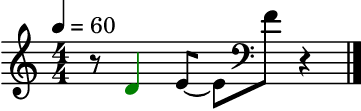

In [7]:
cropped = ch.cropped(0.5, 3)
cropped.dump()
cropped

Chain([4D:1♩:symbols=[Color(green)], 4E:1♩:symbols=[SizeFactor(0.9)], 4F:1/2♩:symbols=[Clef(kind=bass, color=red)]], offset=1/4)
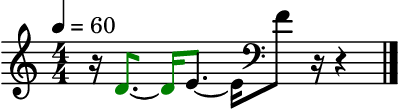

In [8]:
cropped.timeShift(-F(1, 4))

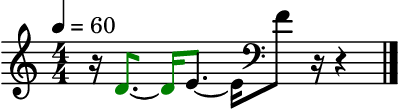

Chain([4D:1♩:offset=0:symbols=[Color(green)], 4E:1♩:offset=1:symbols=[SizeFactor(0.9)], 4F:1/2♩:offset=2:symbols=[Clef(kind=bass, color=red)]], offset=1/4)
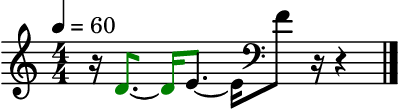

In [9]:
cropped2 = cropped.copy()
cropped2.timeShiftInPlace(-F(1, 4))
with CoreConfig(quantBreakBeats='all'):
    cropped2.show()
cropped2

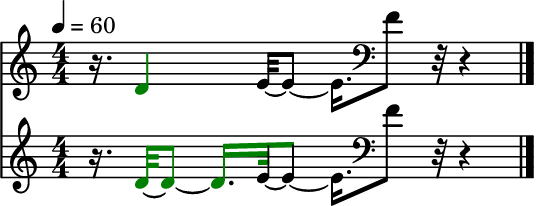

In [10]:
cropped3 = cropped.copy()
cropped3.timeShiftInPlace(F(-1, 8))
cropped4 = cropped3.copy()

cropped3.setConfig('quant.syncopExcludeSymDurs', (7,))
cropped4.setConfig('quant.syncopExcludeSymDurs', (5, 7))

cropped4.addSpanner('beam', 0, 1)

sco = Score([cropped3, cropped4])
sco.show()
sco.write('~/tmp/beam.ly')

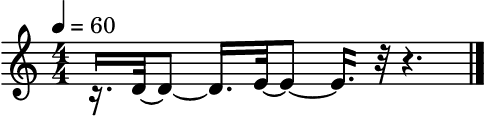

In [11]:
from maelzel.core import *
ch = Voice(r"""
r:3/8
d4:1
e4:1
""")
ch.addSpanner('beam', 0, 1)
# ch.addSpanner('beam', 2, 3)
ch.show()

[maelzel.scoring:notation.py:652:addSpanner:INFO] A Notation cannot be assigned both start and end of a spanner. Removing the partner spannerself=‹r 2:3 1♩ spanners=[Hairpin(direction=<, kind=start, nestingLevel=1, uuid=f94zy9ax)]›, spanner=Hairpin(direction=<, kind=end, nestingLevel=1, uuid=f94zy9ax), partner=Hairpin(direction=<, kind=start, nestingLevel=1, uuid=f94zy9ax), end=None
[maelzel.scoring:renderlily.py:1185:write:DEBUG] Rendering lilypond '/home/em/.cache/tmp4x2tb1dl/u2fas2lq.ly' to '/home/em/.cache/tmp4x2tb1dl/u2fas2lq.png'


---- [‹4D 0:1 1♩›, ‹4E 1:2 1♩›, ‹r 2:3 1♩›, ‹r 3:5 2♩›, ‹4F 5:6 1♩›] [Fraction(2, 1), Fraction(3, 1)]


[maelzel.scoring:renderlily.py:1201:write:DEBUG] Found crop file '/home/em/.cache/tmp4x2tb1dl/u2fas2lq.cropped.png', using that as output
[maelzel.scoring:renderlily.py:1211:write:DEBUG] Moving /home/em/.cache/tmp4x2tb1dl/u2fas2lq.cropped.png to /home/em/.cache/tmp4x2tb1dl/3sj2rigf.png


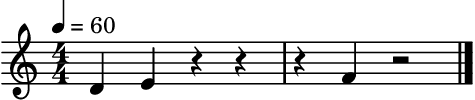

In [1]:
from maelzel.core import *
ch = Voice(r"""
d4:1
e4:1
f4:1:offset=5
""")
# ch.addSpanner('beam', 0, 1)
# ch.addBreak(3)

# ch.addSpanner('beam', 2, 3)
ch.addSpanner("cresc", 2, 3)
# ch.write("~/tmp/beam2.ly")

logger.parent.setLevel("DEBUG")
ch.show()

In [2]:
ch.unquantizedScore().dump()

[maelzel.scoring:notation.py:652:addSpanner:INFO] A Notation cannot be assigned both start and end of a spanner. Removing the partner spannerself=‹r 2:3 1♩ spanners=[Hairpin(direction=<, kind=start, nestingLevel=1, uuid=f94zy9ax)]›, spanner=Hairpin(direction=<, kind=end, nestingLevel=1, uuid=f94zy9ax), partner=Hairpin(direction=<, kind=start, nestingLevel=1, uuid=f94zy9ax), end=None


---- [‹4D 0:1 1♩›, ‹4E 1:2 1♩›, ‹r 2:3 1♩›, ‹r 3:5 2♩›, ‹4F 5:6 1♩›] [Fraction(2, 1), Fraction(3, 1)]
‹4D 0:1 1♩›
‹4E 1:2 1♩›
‹r 2:3 1♩›
‹r 3:5 2♩›
‹4F 5:6 1♩›


In [4]:
ch.scoringParts()[0].dump()

‹4D 0:1.25 5/4♩›
‹4E~ 1.25:2 3/4♩›
‹~4E 2:2.25 1/4♩ spanners=[Beam(kind=start, nestingLevel=1, uuid=8r19oq8z)]›
‹r 2.25:3 3/4♩ spanners=[Beam(kind=end, nestingLevel=1, uuid=8r19oq8z)]›


In [5]:
ch._postSymbols

[(Beam(kind=start, uuid=8r19oq8z), 2, 3)]

[maelzel.scoring:node.py:1006:_splitNotationAtBeat:DEBUG] Syncopation at 0:2 - <bound method QuantizedMeasure._splitStrongBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «4C 0:0.5 1/2♩»
                «4D 0.5:1.5 1♩»
                «r 1.5:3 3/2♩»
                Node(5/4, dur=1 «r 3:3.2 1/5♩ 1,5/4»
                                «4E~ 3.2:4 4/5♩ 1,5/4 noteheads=['0:?'] properties={'.forwardTies': {0}}»)), profile=high)> was positive, splitting
[maelzel.scoring:node.py:1002:_splitNotationAtBeat:DEBUG] Syncopation at 0:1, <bound method QuantizedMeasure._splitWeakBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «4C 0:0.5 1/2♩»
                «4D 0.5:1.5 1♩»
                «r 1.5:2 1/2♩»
                «r 2:3 1♩»
                Node(5/4, dur=1 «r 3:3.2 1/5♩ 1,5/4»
                                «4E~ 3.2:4 4/5♩ 1,5/4 noteheads=['0:?'] properties={'.forwardTies': {0}}»)), profile=high)> negative, «4D 0.5:1.5 1♩» will NOT be split


Chain([4C:1/2♩, 4D:1♩, Chain([4E:1♩:offset=1:symbols=[Notehead(parenthesis=True)], 4F:2♩:symbols=[Notehead(shape=cross), Color(green)]], offset=2476979795053773/1125899906842624)])
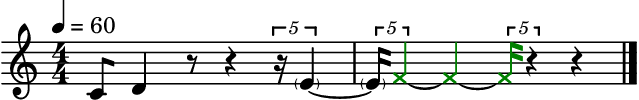

In [3]:
ch2 = Chain([
    "4C:0.5",
    "4D:1",
    Chain([
        "(4E):1:offset=1",
        "4F:2:x:green"
    ], offset=2.2)
])
ch2

[maelzel.scoring:node.py:436:mergedNotations:DEBUG] Merged notations in 2 iterations
[maelzel.scoring:node.py:1006:_splitNotationAtBeat:DEBUG] Syncopation at 0:2 - <bound method QuantizedMeasure._splitStrongBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «r 0:0.75 3/4♩»
                «4D 0.75:1.5 3/4♩»
                «r 1.5:3 3/2♩»
                Node(5/4, dur=1 «r 3:3.2 1/5♩ 1,5/4»
                                «4E~ 3.2:4 4/5♩ 1,5/4 noteheads=['0:?'] properties={'.forwardTies': {0}}»)), profile=high)> was positive, splitting
[maelzel.scoring:node.py:1002:_splitNotationAtBeat:DEBUG] Syncopation at 0:1, <bound method QuantizedMeasure._splitWeakBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «r 0:0.75 3/4♩»
                «4D 0.75:1.5 3/4♩»
                «r 1.5:2 1/2♩»
                «r 2:3 1♩»
                Node(5/4, dur=1 «r 3:3.2 1/5♩ 1,5/4»
                                «4E~ 3.2:4 4/5♩ 1,5/4 noteheads=['0:?'] prope

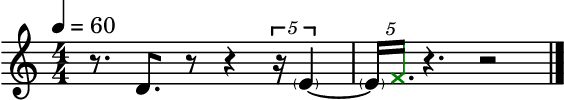

In [4]:
ch3 = ch2.cropped(0.75, (1, 0.5))
ch3.dump()
ch3.show()

[maelzel.scoring:node.py:436:mergedNotations:DEBUG] Merged notations in 2 iterations
[maelzel.scoring:node.py:1006:_splitNotationAtBeat:DEBUG] Syncopation at 0:2 - <bound method QuantizedMeasure._splitStrongBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «r 0:0.75 3/4♩»
                «4D 0.75:1.5 3/4♩»
                «r 1.5:3 3/2♩»
                Node(5/4, dur=1 «r 3:3.2 1/5♩ 1,5/4»
                                «4E~ 3.2:4 4/5♩ 1,5/4 noteheads=['0:?'] properties={'.forwardTies': {0}}»)), profile=high)> was positive, splitting
[maelzel.scoring:node.py:1002:_splitNotationAtBeat:DEBUG] Syncopation at 0:1, <bound method QuantizedMeasure._splitWeakBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «r 0:0.75 3/4♩»
                «4D 0.75:1.5 3/4♩»
                «r 1.5:2 1/2♩»
                «r 2:3 1♩»
                Node(5/4, dur=1 «r 3:3.2 1/5♩ 1,5/4»
                                «4E~ 3.2:4 4/5♩ 1,5/4 noteheads=['0:?'] prope

Voice([4D:3/4♩:offset=0.75, Chain([4E:1♩:symbols=[Notehead(parenthesis=True)], 4F:~3/10♩:symbols=[Notehead(shape=cross), Color(green)]], offset=3602879701896397/1125899906842624)])
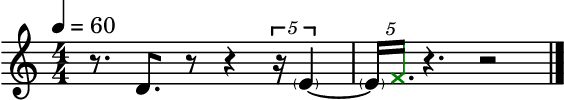

In [5]:
ch3.asVoice()

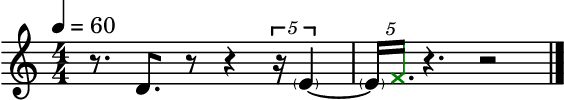

3/4


[maelzel.scoring:renderlily.py:1185:write:DEBUG] Rendering lilypond '/home/em/.cache/tmp4x2tb1dl/t5aox16b.ly' to '/home/em/.cache/tmp4x2tb1dl/t5aox16b.png'
[maelzel.scoring:renderlily.py:1201:write:DEBUG] Found crop file '/home/em/.cache/tmp4x2tb1dl/t5aox16b.cropped.png', using that as output
[maelzel.scoring:renderlily.py:1211:write:DEBUG] Moving /home/em/.cache/tmp4x2tb1dl/t5aox16b.cropped.png to /home/em/.cache/tmp4x2tb1dl/848vmy5n.png


Chain([4D:3/4♩, Chain([4E:1♩:symbols=[Notehead(parenthesis=True)], 4F:~3/10♩:symbols=[Notehead(shape=cross), Color(green)]], offset=2758454771764429/1125899906842624)])
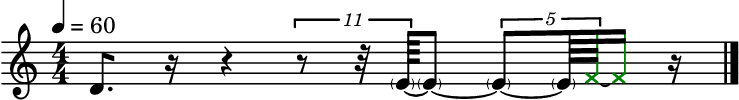

In [6]:
ch3.show()
ch3.dump()
print(ch3[0].absOffset())
ch4 = ch3.timeShift(-ch3[0].absOffset())
ch4.removeRedundantOffsets()
ch4.dump()
# ch4.beamBreak(3)
ch4

[maelzel.scoring:node.py:436:mergedNotations:DEBUG] Merged notations in 2 iterations
[maelzel.scoring:node.py:1002:_splitNotationAtBeat:DEBUG] Syncopation at 0:2, <bound method QuantizedMeasure._splitStrongBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «4C 0:0.5 1/2♩»
                «4D 0.5:1.5 1♩»
                «4E 1.5:2.5 1♩»
                «4F 2.5:3.5 1♩»
                «4G~ 3.5:4 1/2♩ properties={'.forwardTies': {0}}»), profile=high)> negative, «4E 1.5:2.5 1♩» will NOT be split
[maelzel.scoring:node.py:1002:_splitNotationAtBeat:DEBUG] Syncopation at 0:1, <bound method QuantizedMeasure._splitWeakBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «4C 0:0.5 1/2♩»
                «4D 0.5:1.5 1♩»
                «4E 1.5:2.5 1♩»
                «4F 2.5:3.5 1♩»
                «4G~ 3.5:4 1/2♩ properties={'.forwardTies': {0}}»), profile=high)> negative, «4D 0.5:1.5 1♩» will NOT be split
[maelzel.scoring:quant.py:702:_splitStrongBea

Chain([4C:1/2♩, 4D:1♩, 4E:1♩, Chain([4F:1♩, 4G:1♩])])
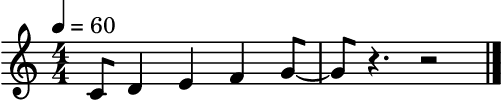

In [1]:
from maelzel.core import *
logger.parent.setLevel("DEBUG")
v = Chain([
    "4C:0.5",
    "4D:1",
    "4E:1",
    Chain("""
    4F:1
    4G:1
    """)# .addSpanner('slur')
])
v

[maelzel.scoring:node.py:1002:_splitNotationAtBeat:DEBUG] Syncopation at 0:1, <bound method QuantizedMeasure._splitWeakBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «r 0:2 2♩»
                «r 2:2.5 1/2♩»
                «4F 2.5:3 1/2♩»
                «r 3:4 1♩»), profile=high)> negative, «r 0:2 2♩» will NOT be split
[maelzel.scoring:renderlily.py:1185:write:DEBUG] Rendering lilypond '/home/em/.cache/tmp_94jd0h6/d8kambam.ly' to '/home/em/.cache/tmp_94jd0h6/d8kambam.png'
[maelzel.scoring:renderlily.py:1201:write:DEBUG] Found crop file '/home/em/.cache/tmp_94jd0h6/d8kambam.cropped.png', using that as output
[maelzel.scoring:renderlily.py:1211:write:DEBUG] Moving /home/em/.cache/tmp_94jd0h6/d8kambam.cropped.png to /home/em/.cache/tmp_94jd0h6/45rrwdyq.png


Chain([4F:1/2♩], offset=5/2)
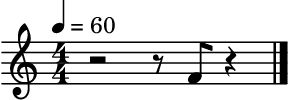

In [2]:
v[-1].cropped(F(5, 2), F(3))

[maelzel.scoring:node.py:1002:_splitNotationAtBeat:DEBUG] Syncopation at 0:2, <bound method QuantizedMeasure._splitStrongBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «r 0:1 1♩»
                «4D 1:1.5 1/2♩»
                «4E 1.5:2.5 1♩»
                «4F 2.5:3 1/2♩»
                «r 3:4 1♩»), profile=high)> negative, «4E 1.5:2.5 1♩» will NOT be split
[maelzel.scoring:renderlily.py:1185:write:DEBUG] Rendering lilypond '/home/em/.cache/tmp_94jd0h6/nqpv8yy_.ly' to '/home/em/.cache/tmp_94jd0h6/nqpv8yy_.png'
[maelzel.scoring:renderlily.py:1201:write:DEBUG] Found crop file '/home/em/.cache/tmp_94jd0h6/nqpv8yy_.cropped.png', using that as output
[maelzel.scoring:renderlily.py:1211:write:DEBUG] Moving /home/em/.cache/tmp_94jd0h6/nqpv8yy_.cropped.png to /home/em/.cache/tmp_94jd0h6/9mkec8ie.png


Chain([4D:1/2♩, 4E:1♩, Chain([4F:1/2♩])], offset=1)
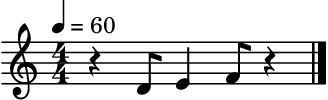

In [3]:
v.cropped(1, 3)

[maelzel.scoring:node.py:436:mergedNotations:DEBUG] Merged notations in 2 iterations
[maelzel.scoring:node.py:1002:_splitNotationAtBeat:DEBUG] Syncopation at 0:1, <bound method QuantizedMeasure._splitWeakBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «r 0:2 2♩»
                «r 2:2.5 1/2♩»
                «4F 2.5:3.5 1♩»
                «4G~ 3.5:4 1/2♩ properties={'.forwardTies': {0}}»), profile=high)> negative, «r 0:2 2♩» will NOT be split
[maelzel.scoring:quant.py:702:_splitStrongBeat:DEBUG] dotted and not aligned, splitting
[maelzel.scoring:node.py:1006:_splitNotationAtBeat:DEBUG] Syncopation at 1:2 - <bound method QuantizedMeasure._splitStrongBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «~4G 0:0.5 1/2♩ properties={'.backwardTies': {0}}»
                «r 0.5:4 7/2♩»), profile=high)> was positive, splitting
[maelzel.scoring:node.py:1002:_splitNotationAtBeat:DEBUG] Syncopation at 1:1, <bound method QuantizedMeasure._split

Chain([4F:1♩, 4G:1♩], offset=5/2)
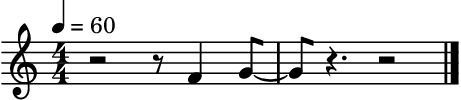

In [4]:
v = Chain([
    "4F:1",
    "4G:1"
], offset=F(5, 2))
v

Chain([4F:0.5♩], offset=5/2)
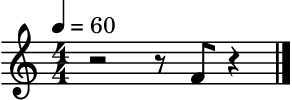

In [18]:
v.cropped(F(5, 2), F(3))

Chain([4F:0.5♩:offset=2.25], offset=1/4)
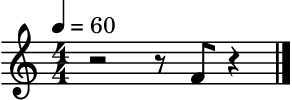

In [19]:
v.cropped(0.25, 3.)

[maelzel.core:chain.py:1181:_scoringParts:DEBUG] Limiting to 1 staf since there are spanners within the contents of this Voice
[maelzel.scoring:node.py:436:mergedNotations:DEBUG] Merged notations in 2 iterations
[maelzel.scoring:node.py:1002:_splitNotationAtBeat:DEBUG] Syncopation at 0:2, <bound method QuantizedMeasure._splitStrongBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «4C 0:0.5 1/2♩»
                «4D 0.5:1.5 1♩»
                «4E 1.5:2.5 1♩»
                «4F 2.5:3.5 1♩ spanners=[Slur(kind=start, linetype=solid, nestingLevel=1, uuid=cqv1ekyw)]»
                «4G~ 3.5:4 1/2♩ properties={'.forwardTies': {0}}»), profile=high)> negative, «4E 1.5:2.5 1♩» will NOT be split
[maelzel.scoring:node.py:1002:_splitNotationAtBeat:DEBUG] Syncopation at 0:1, <bound method QuantizedMeasure._splitWeakBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «4C 0:0.5 1/2♩»
                «4D 0.5:1.5 1♩»
                «4E 1.5:2.5 1♩»
  

Voice([4C:1/2♩, 4D:1♩, 4E:1♩, Chain([4F:1♩:symbols=[Slur(anchor=4F, kind=start, uuid=cqv1ekyw)], 4G:1♩:symbols=[Slur(anchor=4G, kind=end, uuid=cqv1ekyw)]])])
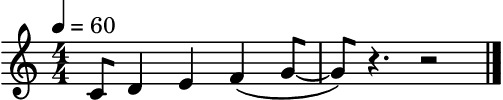

In [5]:
from maelzel.core import *
v = Voice([
    "4C:0.5",
    "4D:1",
    "4E:1",
    Chain("""
    4F:1
    4G:1
    """).addSpanner('slur')
        
    
])
v

[maelzel.core:chain.py:1181:_scoringParts:DEBUG] Limiting to 1 staf since there are spanners within the contents of this Voice
[maelzel.scoring:spanner.py:124:markNestingLevels:ERROR] No end spanner found for ('cqv1ekyw', Slur(kind=start, linetype=solid, nestingLevel=1, uuid=cqv1ekyw))
[maelzel.scoring:node.py:1002:_splitNotationAtBeat:DEBUG] Syncopation at 0:2, <bound method QuantizedMeasure._splitStrongBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «r 0:0.25 1/4♩»
                «4C 0.25:0.5 1/4♩»
                «4D 0.5:1.5 1♩»
                «4E 1.5:2.5 1♩»
                «4F 2.5:3 1/2♩ spanners=[Slur(kind=start, linetype=solid, nestingLevel=1, parent=«4F 2.5:3 1/2♩ spanners=[...]», uuid=cqv1ekyw)]»
                «r 3:4 1♩»), profile=high)> negative, «4E 1.5:2.5 1♩» will NOT be split
[maelzel.scoring:node.py:1002:_splitNotationAtBeat:DEBUG] Syncopation at 0:1, <bound method QuantizedMeasure._splitWeakBeat of QuantizedMeasure(timesig=4/4, quarterTem

Voice([4C:1/4♩:offset=0.25, 4D:1♩, 4E:1♩, Chain([4F:1/2♩:symbols=[Slur(anchor=4F, kind=start, uuid=cqv1ekyw)]])])
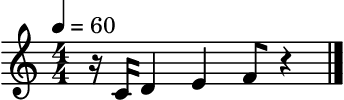

In [6]:
v2 = v.cropped(0.25, 3.)
v2

In [22]:
ch = Chain([
    Note("4D~", 1, amp=0.1),
    Note("4D", 2, amp=1).setPlay(fade=(0, 1))
])
print(ch.synthEvents())
ch.play()
    

[SynthEvent(delay=0, dur=3, instr=.piano, gain=1, chan=1, fade=(0.02, 1), position=0.5, bps=‹0.0s 62 0.1; 1.0s 62 1; 3.0s 62 1›)]


created pipewire module
--Csound version 7.0 (double samples) Jul  6 2025
[commit: 13e86532f568b6c148fbff180a8bf934f97dec5b]
libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(‖ preset:.piano=401.0002 start=.158 dur=3 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=1 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=62 p21=0.1 p22=1 p23=62 …)

In [23]:
ch = Chain([
    "4C:1:offset=0.5",
    "4E:1",
    "4G:1"
])
ch.dump()
ch.absorbInitialOffset()
ch.dump()